# Regresión lineal en Python con scikit-learn
## El paquete scikit-learn para regresión lineal y la selección de rasgos



In [39]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

In [16]:
data_ads = pd.read_csv("../../datasets/ads/advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
feature_cols = ["TV", "Radio", "Newspaper"]

Dividimos el recordset en dos, el de proceso con solo los rasgos -*features*- (cols "X") y el de resultados (col "Y")

In [29]:
X = data_ads[feature_cols]
Y = data_ads["Sales"]

Con scykit se necesita definir
- Estimador que vamos a usar (lineal):  usamos la libreria [svm](https://scikit-learn.org/stable/modules/svm.html) de uso para regresion, clasificacion y deteccion de outliers
    - parametro `kernel`: linear
- selector que vamos a entrenar: con la libreria [RFE de feature_selection](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html), que nos hace exactamente Feature ranking with recursive feature elimination, esto es: va añadiendo del dataset de features las columnas uan a una despreciando las que no aporten nada al modelo. Sus prámetros son:
    - `estimator`: el estimador que hemos definido
    - `n_features_to_select`: numero de columnas que quiero en el modelo final: nunca serán todas, aquí ya le doy una pista.
    - `step`: numero (o porcentaje si entre 0 y 1) de features que queremos quitar con cada iteración. Va desde todas hasta el número que le digamos
    

In [43]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X,Y)

In [35]:
# Columnas que ha elegido
X.columns[selector.support_]

Index(['TV', 'Radio'], dtype='object')

In [32]:
# ranking de las columnas
selector.ranking_

array([1, 1, 2])

## predicciones
LinearRegression es una clase que nos da un modelo lineal (y =w0 + w1x1+ w2x2+ ...) que cumple con los mínimos cuadrados, esto es minimiza la suma de los cuadrados de las diferencias entre lo observado y lo obtenido mediante dicho modelo.

- fit_intercept: bool
	- Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
- normalize: bool
	- This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.
- copy_X: bool
	- If True, X will be copied; else, it may be overwritten.
- n_jobs: int
	- The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.


Si no se le dice lo contrario, LinearRegression trabaja con (copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [47]:
X_pred = X[["TV", "Radio"]]

In [44]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lm.intercept_

2.921099912405138

In [41]:
lm.coef_

array([0.04575482, 0.18799423])

In [42]:
# Coeficiente R^2, casi uno, como vimos
lm.score(X_pred, Y)

0.8971942610828956

In [52]:
data_ads["S_Pred"] = lm.predict(data_ads[["TV","Radio"]])

In [59]:
data_ads.head(10)

,TV,Radio,Newspaper,Sales,S_Pred,media
0,230.1,37.8,69.2,22.1,20.555465,14.0225
1,44.5,39.3,45.1,10.4,12.345362,14.0225
2,17.2,45.9,69.3,9.3,12.337018,14.0225
3,151.5,41.3,58.5,18.5,17.617116,14.0225
4,180.8,10.8,58.4,12.9,13.223908,14.0225
5,8.7,48.9,75.0,7.2,12.512084,14.0225
6,57.5,32.8,23.5,11.8,11.718212,14.0225
7,120.2,19.6,11.6,13.2,12.105516,14.0225
8,8.6,2.1,1.0,4.8,3.709379,14.0225
9,199.8,2.6,21.2,10.6,12.551697,14.0225


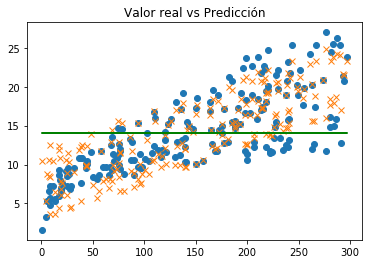

In [56]:
import matplotlib.pyplot as plt

plt.plot(data_ads["TV"], data_ads["Sales"], "o")
plt.plot(data_ads["TV"], data_ads["S_Pred"], "x")
plt.plot(data_ads["TV"], data_ads["media"], "g")
plt.title ("Valor real vs Predicción")
plt.show()

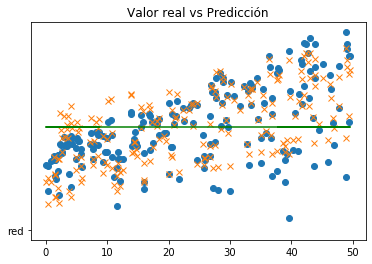

In [60]:
import matplotlib.pyplot as plt

plt.plot(data_ads["Radio"], data_ads["Sales"], "o")
plt.plot(data_ads["Radio"], data_ads["S_Pred"], "x")
plt.plot(data_ads["Radio"], data_ads["media"], "g")
plt.title ("Valor real vs Predicción")
plt.show()